In [1]:
%run ../../import_src.py

import lymedata
from lymedata import *
import constants
from constants import *

import haddock_ssnmf
from haddock_ssnmf import Haddock_SSNMF

import display_ssnmf
from display_ssnmf import *


OWD
after defn.label  Index(['Unnamed: 0', 'patient_id', 'patient_id_demographics',
       'survey_complete_demographics', '*R130_STATE_P2', 'R160_COUNTRY_P2',
       'R190_ETHNIC_P2', '*R200_SEX_P2', 'R210_GNDRID_P2', 'R220_SEXPREF_P2',
       ...
       'W370_1_ABX30ADDL_P2', 'W381_HXABXADV_P2', 'W390_HXADVWRST_P2',
       'W400_HXCDIF_P2', 'W420_SURVEYTIME_P2', 'patient_id_sf36',
       'survey_complete_sf36', 'GENHTH', 'neuro', 'musculo'],
      dtype='object', length=787)
Both Neuro and Mus: 1562
Only Neuro: 632
Only Mus: 963
Neither Neuro nor Mus: 806
Dropping 99
(878, 29)
Index(['recall a tick bite', 'length of time noticed tick bite',
       'treated with antibiotics', 'length of time treated for tick bite',
       'period of time for diagnosis', 'misdiagnosis', 'tick born coinfection',
       'Babesia', 'Bartonella', 'Ehrlichia/ Anaplasma', 'Mycoplasma',
       'Rickettsia', 'Bio Sex', 'Antibiotics', 'Times Infected', 'GROC',
       'Bed Days', 'Mental Health Days', 'Physical 

/home/reu24lyme/alex/code_lib/src/lymedata.py:75: DtypeWarning: Columns (224,249,259,269,274,294,299,304,309,339,344,365,369,373,377,395,399,403,411,415,419,423,435) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Original Working Definition: Neuro vs Non-Neuro
best accuracy:  0.622532928064843  best params:  {'k': 3, 'lambda': 66.66666666666667, 'random_state': 2}
test_accuracy:  0.6420454545454546


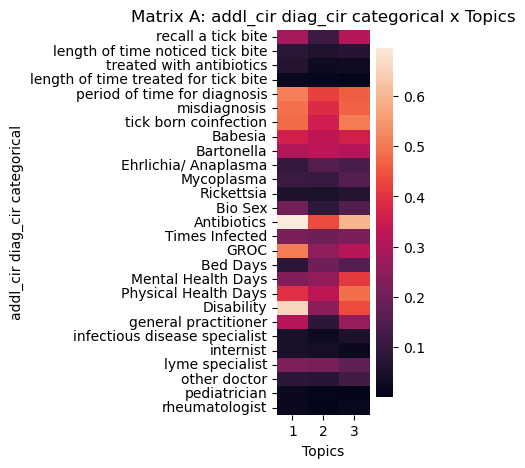

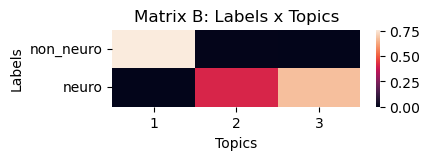

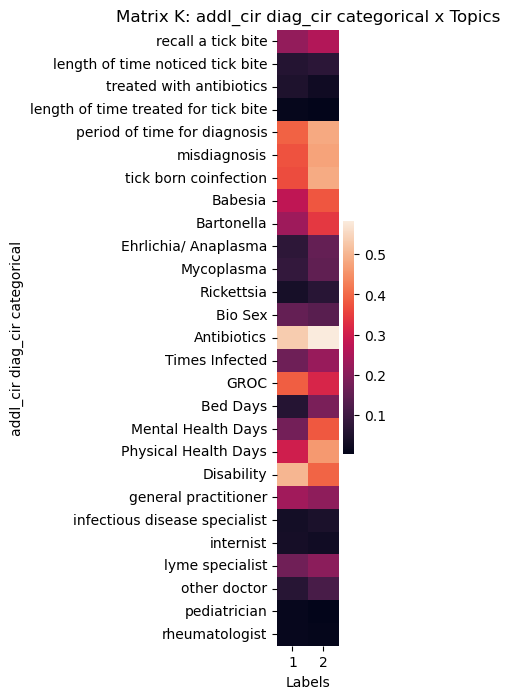

In [2]:
# Original Working Defn
data = LymeData({CHRONIC, NEURO},{ADDL_CIR, DIAG_CIR, CATG},{NEURO, NON_NEURO}, defn=DEF_OWD, drop_99=True)
print(data.df.shape)
print(data.df.columns)

data_matrix, label_matrix = data.get_data_and_labels()

ssnmf = Haddock_SSNMF(data_matrix, label_matrix)
best_accuracy, best_params = ssnmf.gridsearch()
print('Original Working Definition: Neuro vs Non-Neuro')
print('best accuracy: ', best_accuracy, ' best params: ', best_params)
test_accuracy = ssnmf.test(best_params)
print('test_accuracy: ', test_accuracy)

# Previous Result: (Might be wrong)
# best accuracy:  0.6282472137791286  best params:  {'k': 3, 'lambda': 56.56565656565657, 'random_state': 5}
# test_accuracy:  0.6136363636363636

# Obtained Result:
# Original Working Definition: Neuro vs Non-Neuro
# best accuracy:  0.622532928064843  best params:  {'k': 3, 'lambda': 66.66666666666667, 'random_state': 2}
# test_accuracy:  0.6420454545454546
names = ADDL_CIR + " "+ DIAG_CIR + " " + CATG
labels = [x for x in data.df.columns if x not in [NEURO, NON_NEURO]]
best_model = ssnmf.best_model
display_ssnmf(model=best_model, feature_name=names, feature_labels=labels, class_labels=data.labels)